# Linguistic Features

In [ ]:
import stanza

stanza.download('en') # download English model

nlp = stanza.Pipeline(
    "en",
    processors="tokenize,pos,lemma,depparse",
    use_gpu=True
)

2025-12-06 00:08:52 INFO: Downloaded file to /Users/vincente/stanza_resources/resources.json
2025-12-06 00:08:52 INFO: Downloading default packages for language: en (English) ...
2025-12-06 00:08:53 INFO: File exists: /Users/vincente/stanza_resources/en/default.zip
2025-12-06 00:08:55 INFO: Finished downloading models and saved to /Users/vincente/stanza_resources
2025-12-06 00:08:55 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-12-06 00:08:55 INFO: Downloaded file to /Users/vincente/stanza_resources/resources.json
2025-12-06 00:08:55 WARNING: Language en package default expects mwt, which has been added
2025-12-06 00:08:55 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

2025-12-06 00:08:55 WARNING: GPU requested, but is not available!
2025-12-06 00:08:55 INFO: Using device: cpu
2025-12-06 00:08:55 INFO: Loading: tokenize
2025-12-06 00:08:55 INFO: Loading: mwt
2025-12-06 00:08:55 INFO: Loading: pos
2025-12-06 00:08:56 INFO: Loading: lemma
2025-12-06 00:08:56 INFO: Loading: depparse
2025-12-06 00:08:56 INFO: Done loading processors!


In [ ]:
import pandas as pd
# import dataframe
df = pd.read_csv("data/sentiment_scores/output_sentiment_clean.csv")

In [3]:
df.head()

,politician,type_of_speech,file_name,text,sadness,joy,love,anger,fear,surprise,...,topic_0_score,topic_1_score,topic_2_score,topic_3_score,topic_4_score,topic_5_score,topic_6_score,cluster,tsne_x,tsne_y
0,king_angus_s_jr,partisan_rally_speeches,"""now_is_the_time_to_establish_a_redline_—_the_...",the senate for maine is recognized. we all beg...,0.124538,0.320375,0.001485,0.482588,0.069628,0.001386,...,0.042844,0.036995,0.017078,0.013314,0.000972,0.004572,0.083707,1,-23.976166,-13.263207
1,king_angus_s_jr,partisan_rally_speeches,Gov._angus_king_speaking_at_a_rally_in_portlan...,angus king. the dogmas of the quiet past are i...,0.013997,0.270341,0.002355,0.592581,0.118445,0.002281,...,0.057972,0.016637,0.014935,0.000000,0.000000,0.006834,0.036449,1,-41.195934,-72.913580
2,king_angus_s_jr,partisan_rally_speeches,Founding_fathers_cold_open_-_snl_processed.txt,"nearly 250 years ago, delegates from the 13 am...",0.006786,0.759802,0.002123,0.222126,0.006815,0.002348,...,0.147585,0.000000,0.000000,0.000000,0.000000,0.000000,0.007381,1,-20.954987,-13.536193
3,king_angus_s_jr,bipartisan_and_other_speeches,bipartisan_unknown_senators_king_collins_celeb...,skip to content click here to sign up for the ...,0.023634,0.767484,0.019325,0.167670,0.019325,0.002562,...,0.000000,0.000000,0.000000,0.000000,0.381938,0.000000,0.000000,2,10.837202,-74.833350
4,king_angus_s_jr,bipartisan_and_other_speeches,bipartisan_unknown_king_questions_experts_on_i...,skip to content click here to sign up for the ...,0.023634,0.767484,0.019325,0.167670,0.019325,0.002562,...,0.000000,0.000000,0.000000,0.000000,0.381938,0.000000,0.000000,2,9.190097,-74.246340


# Running Stanza on 3 Politicans

High Variation #1: gillibrand_kirsten_e
High Variation #2: correa_j
Low Variation: bera_ami

In [5]:
df_gill = df[df['politician'] == "gillibrand_kirsten_e"].copy()
df_corr = df[df['politician'] == "correa_j"].copy()
df_bera = df[df['politician'] == "bera_ami"].copy()

In [5]:
df_gill.head()

,politician,type_of_speech,file_name,text,sadness,joy,love,anger,fear,surprise,...,topic_0_score,topic_1_score,topic_2_score,topic_3_score,topic_4_score,topic_5_score,topic_6_score,cluster,tsne_x,tsne_y
557,gillibrand_kirsten_e,partisan_rally_speeches,New_york_sen._kirsten_gillibrand_joins_2020_pr...,senator kirsten gillibrand is jumping into the...,0.004423,0.629822,0.052964,0.270543,0.005292,0.036956,...,0.142183,0.000000,0.002627,0.021237,0.005229,0.000000,0.029386,1,-38.024555,11.211616
558,gillibrand_kirsten_e,partisan_rally_speeches,Kirsten_gillibrand_-_full_power_of_women_speec...,"six months and eight days ago, a story broke i...",0.458629,0.354935,0.004127,0.174485,0.006477,0.001347,...,0.064705,0.019377,0.020066,0.008998,0.000000,0.045415,0.013078,2,-82.913080,2.368134
559,gillibrand_kirsten_e,house_floor_speeches,floor_2024_02_07_CREC_2024_02_07_pt1_PgH509_pr...,"[congressional record volume 170, number 22 (w...",0.058231,0.292128,0.032413,0.576505,0.038495,0.002228,...,0.008373,0.158902,0.000243,0.013835,0.026558,0.186155,0.000000,3,27.361588,48.944542
560,gillibrand_kirsten_e,house_floor_speeches,floor_2024_02_28_CREC_2024_02_28_pt1_PgH722_pr...,"[congressional record volume 170, number 36 (w...",0.015087,0.657641,0.004971,0.285217,0.033769,0.003315,...,0.000000,0.165605,0.015576,0.000000,0.004920,0.004488,0.000000,3,52.670757,25.747150
561,gillibrand_kirsten_e,house_floor_speeches,floor_2024_03_06_CREC_2024_03_06_pt1_PgH831_pr...,"[congressional record volume 170, number 40 (w...",0.301817,0.363112,0.326200,0.005915,0.001941,0.001015,...,0.023347,0.161005,0.000000,0.046866,0.000000,0.000000,0.000000,2,27.170633,-28.604383


In [6]:
df_corr.head()

,politician,type_of_speech,file_name,text,sadness,joy,love,anger,fear,surprise,...,topic_0_score,topic_1_score,topic_2_score,topic_3_score,topic_4_score,topic_5_score,topic_6_score,cluster,tsne_x,tsne_y
1803,correa_j,partisan_rally_speeches,‘they_used_us’__latino_voters_in_florida_react...,a wave of disappointment. one of president don...,0.527791,0.354140,0.002074,0.088208,0.026908,0.000880,...,0.065347,0.000000,0.000893,0.0,0.010526,0.026599,0.11439,4,-25.155493,-44.321750
1804,correa_j,partisan_rally_speeches,Lou_correa_asks_doj_official_at_what_point_a_c...,i recognize myself for five minutes of questio...,0.011420,0.466925,0.003610,0.498243,0.017928,0.001874,...,0.032467,0.038614,0.052717,0.0,0.040433,0.000000,0.03654,4,-10.605682,4.920082
1805,correa_j,partisan_rally_speeches,Blessing_the_next_generation_beyond_their_circ...,"mawapan si nyopol hindi po kasi pasar jeff, ma...",0.164507,0.536388,0.027761,0.229811,0.040451,0.001081,...,0.120428,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,2,-80.165920,10.837220
1806,correa_j,partisan_rally_speeches,Houston_astros_shortstop_carlos_correa_on_worl...,"congratulations, first of all. thank you. is i...",0.052958,0.933862,0.003567,0.005188,0.003746,0.000679,...,0.158664,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,1,9.042685,-26.497970
1807,correa_j,partisan_rally_speeches,The_group_s_rally_cars_processed.txt,"a few months ago, as some of you likely know, ...",0.030945,0.803337,0.002152,0.143005,0.018645,0.001917,...,0.048493,0.008740,0.014488,0.0,0.000000,0.002707,0.00000,2,16.800093,-10.850982


In [7]:
df_bera.head()

,politician,type_of_speech,file_name,text,sadness,joy,love,anger,fear,surprise,...,topic_0_score,topic_1_score,topic_2_score,topic_3_score,topic_4_score,topic_5_score,topic_6_score,cluster,tsne_x,tsne_y
2057,bera_ami,partisan_rally_speeches,Congressman_ami_bera_at_chhankata_2014_on_augu...,congressman emmy vera is amongst us. we extend...,0.003677,0.905352,0.012298,0.070433,0.007287,0.000952,...,0.041818,0.015630,0.012648,0.000000,0.000000,0.000000,0.015023,2,-30.410494,-16.793869
2058,bera_ami,partisan_rally_speeches,A_conversation_with_congressman_ami_bera_proce...,"yes, great to have all of you here this aftern...",0.007667,0.897467,0.002586,0.066398,0.005037,0.020847,...,0.121277,0.009307,0.016124,0.000000,0.006224,0.000000,0.017051,2,-31.812910,-30.538492
2059,bera_ami,partisan_rally_speeches,Support_rally_featuring_bill_clinton__dr._ami_...,let us do this. this feels like coming home be...,0.035050,0.697450,0.025213,0.236826,0.003902,0.001558,...,0.074493,0.004816,0.001193,0.000000,0.008015,0.080092,0.041656,1,-23.781902,-39.906338
2060,bera_ami,partisan_rally_speeches,"Dr._ami_bera_campaign_gotv_rally_nov._6,_2016_...","yeah, it is great to be flanked by our local a...",0.015523,0.917010,0.002470,0.062471,0.001200,0.001326,...,0.135864,0.000000,0.000092,0.007033,0.000000,0.000000,0.004332,1,-34.385654,-15.705953
2061,bera_ami,partisan_rally_speeches,3.9.17._hfac_member_rep._ami_bera_remarks_on_r...,"this hearing, it is disturbing to me, you know...",0.565048,0.025713,0.002153,0.396107,0.010382,0.000597,...,0.061026,0.013752,0.000000,0.004579,0.000000,0.000000,0.059279,4,27.667004,-9.974813


### Gently Clean

In [3]:
def clean_text(t):
    return t.replace('\n', ' ').strip()

df_corr['clean_text'] = df_corr['text'].apply(clean_text)
df_bera['clean_text'] = df_bera['text'].apply(clean_text)
df_gill['clean_text'] = df_gill['text'].apply(clean_text)

### Stanza Operations

In [14]:
def stanza_by_sentence(text):
    if not isinstance(text, str) or not text.strip():
        return None

    doc = nlp(text)
    
    # list of stanza Sentence objects
    return doc.sentences

df_corr['stanza_doc'] = df_corr['clean_text'].apply(stanza_by_sentence)

In [ ]:
df_bera['stanza_doc'] = df_bera['clean_text'].apply(stanza_by_sentence)

In [ ]:
df_gill['stanza_doc'] = df_gill['clean_text'].apply(stanza_by_sentence)

In [ ]:
sentiment_cols = ["sadness", "joy", "love", "anger", "fear", "surprise"]

df_corr["avg_sentiment"] = df_corr[sentiment_cols].mean(axis=1)
df_bera["avg_sentiment"] = df_bera[sentiment_cols].mean(axis=1)
df_gill["avg_sentiment"] = df_gill[sentiment_cols].mean(axis=1)

In [ ]:
# def sentence_lengths(doc):
#     return [len(sent.words) for sent in doc.sentences]

def sentence_lengths(sentences):
    if sentences is None:
        return []
    # sentences is already a list of Sentence objects from stanza_by_sentence
    return [len(sent.words) for sent in sentences]

df_corr['sentence_lengths'] = df_corr['stanza_doc'].apply(sentence_lengths)
df_corr['avg_sentence_length'] = df_corr['sentence_lengths'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

df_bera['sentence_lengths'] = df_bera['stanza_doc'].apply(sentence_lengths)
df_bera['avg_sentence_length'] = df_bera['sentence_lengths'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

df_gill['sentence_lengths'] = df_gill['stanza_doc'].apply(sentence_lengths)
df_gill['avg_sentence_length'] = df_gill['sentence_lengths'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

In [ ]:
from collections import Counter

# def pos_counts(doc):
#     tags = [w.xpos for sent in doc.sentences for w in sent.words]
#     return Counter(tags)

def pos_counts(sentences):
    if sentences is None:
        return Counter()
    # sentences is already a list of Sentence objects from stanza_by_sentence
    tags = [w.xpos for sent in sentences for w in sent.words]
    return Counter(tags)

df_corr['pos_counts'] = df_corr['stanza_doc'].apply(pos_counts)
df_gill['pos_counts'] = df_gill['stanza_doc'].apply(pos_counts)
df_bera['pos_counts'] = df_bera['stanza_doc'].apply(pos_counts)

In [40]:
def normalize_counts(counts):
    total = sum(counts.values())
    return {k: v/total for k,v in counts.items()}

df_bera['pos_freq'] = df_bera['pos_counts'].apply(normalize_counts)
df_corr['pos_freq'] = df_corr['pos_counts'].apply(normalize_counts)
df_gill['pos_freq'] = df_gill['pos_counts'].apply(normalize_counts)

In [ ]:
# def dep_labels(doc):
#     return [w.deprel for sent in doc.sentences for w in sent.words]

def dep_labels(sentences):
    if sentences is None:
        return []
    # sentences is already a list of Sentence objects from stanza_by_sentence
    return [w.deprel for sent in sentences for w in sent.words]

df_gill['dep_labels'] = df_gill['stanza_doc'].apply(dep_labels)
df_corr['dep_labels'] = df_corr['stanza_doc'].apply(dep_labels)
df_bera['dep_labels'] = df_bera['stanza_doc'].apply(dep_labels)

### Extract Year from Filename

In [43]:
import re

def extract_year(filename):
    if not isinstance(filename, str):
        return None
    
    # Extract ANY 4-digit numbers
    match = re.findall(r"(\d{4})", filename)
    
    # No match
    if not match:
        return None
    
    # Convert all matches to integers, keep only years after 2000
    years = [int(y) for y in match if 2000 <= int(y) <= 2099]
    
    return years[0] if years else None

df_bera["year"] = df_bera["file_name"].apply(extract_year)
df_corr["year"] = df_corr["file_name"].apply(extract_year)
df_gill["year"] = df_gill["file_name"].apply(extract_year)


In [44]:
df_gill["date"] = pd.to_datetime(df_gill["year"], format="%Y")
df_corr["date"] = pd.to_datetime(df_corr["year"], format="%Y")
df_bera["date"] = pd.to_datetime(df_bera["year"], format="%Y")

In [45]:
df_bera['pronoun_rate'] = df_bera['pos_counts'].apply(lambda c: c.get('PRP', 0))
df_bera['modal_rate']   = df_bera['pos_counts'].apply(lambda c: c.get('MD', 0))
df_bera['adj_rate']     = df_bera['pos_counts'].apply(lambda c: c.get('JJ', 0))

df_corr['pronoun_rate'] = df_corr['pos_counts'].apply(lambda c: c.get('PRP', 0))
df_corr['modal_rate']   = df_corr['pos_counts'].apply(lambda c: c.get('MD', 0))
df_corr['adj_rate']     = df_corr['pos_counts'].apply(lambda c: c.get('JJ', 0))


df_gill['pronoun_rate'] = df_gill['pos_counts'].apply(lambda c: c.get('PRP', 0))
df_gill['modal_rate']   = df_gill['pos_counts'].apply(lambda c: c.get('MD', 0))
df_gill['adj_rate']     = df_gill['pos_counts'].apply(lambda c: c.get('JJ', 0))

In [46]:
df_gill['nsubj_count'] = df_gill['dep_labels'].apply(lambda x: x.count('nsubj'))
df_gill['advmod_count'] = df_gill['dep_labels'].apply(lambda x: x.count('advmod'))
df_gill['aux_count'] = df_gill['dep_labels'].apply(lambda x: x.count('aux'))

df_corr['nsubj_count'] = df_corr['dep_labels'].apply(lambda x: x.count('nsubj'))
df_corr['advmod_count'] = df_corr['dep_labels'].apply(lambda x: x.count('advmod'))
df_corr['aux_count'] = df_corr['dep_labels'].apply(lambda x: x.count('aux'))

df_bera['nsubj_count'] = df_bera['dep_labels'].apply(lambda x: x.count('nsubj'))
df_bera['advmod_count'] = df_bera['dep_labels'].apply(lambda x: x.count('advmod'))
df_bera['aux_count'] = df_bera['dep_labels'].apply(lambda x: x.count('aux'))

### Visualizations

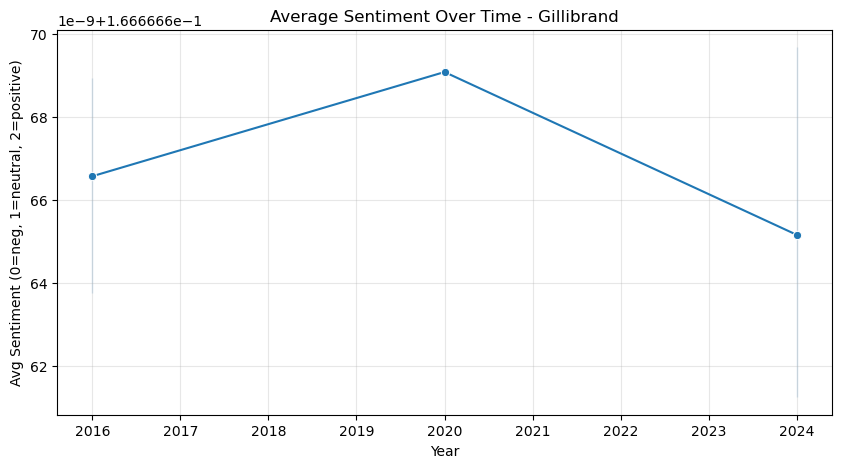

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=df_gill.sort_values("year"), x="year", y="avg_sentiment", marker="o")
plt.title("Average Sentiment Over Time - Gillibrand")
plt.xlabel("Year")
plt.ylabel("Avg Sentiment (0=neg, 1=neutral, 2=positive)")
plt.grid(True, alpha=0.3)
plt.show()

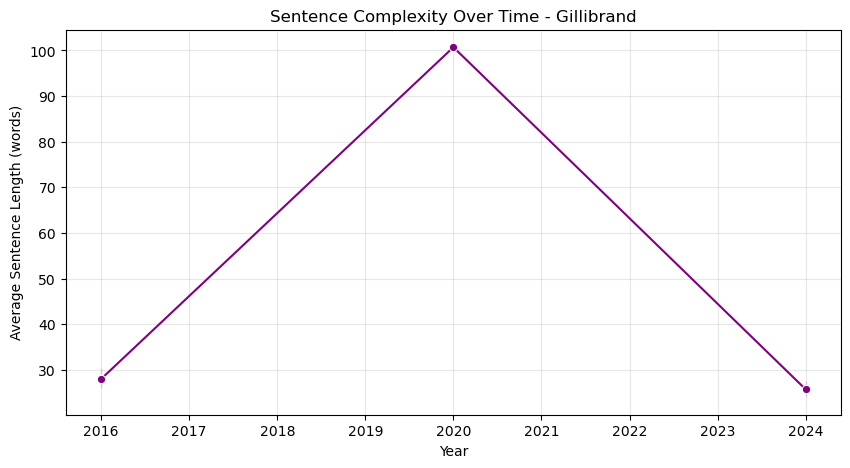

In [48]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_gill.sort_values("year"), x="year", y="avg_sentence_length", marker="o", color="purple")
plt.title("Sentence Complexity Over Time - Gillibrand")
plt.xlabel("Year")
plt.ylabel("Average Sentence Length (words)")
plt.grid(True, alpha=0.3)
plt.show()

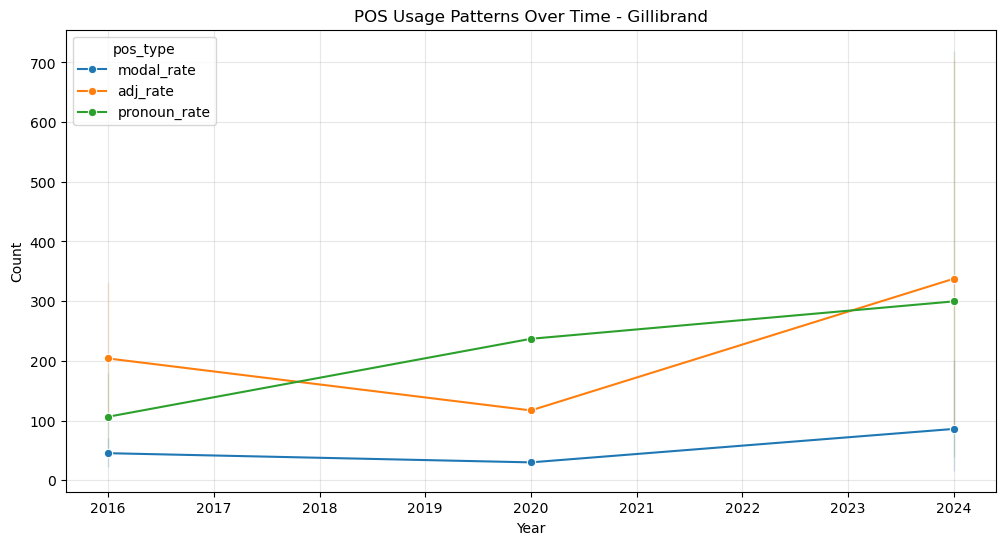

In [49]:
plt.figure(figsize=(12,6))
melt_df = df_gill.melt(
    id_vars=["year"],
    value_vars=["pronoun_rate", "modal_rate", "adj_rate"],
    var_name="pos_type",
    value_name="count"
)

sns.lineplot(data=melt_df.sort_values("year"), x="year", y="count", hue="pos_type", marker="o")
plt.title("POS Usage Patterns Over Time - Gillibrand")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()

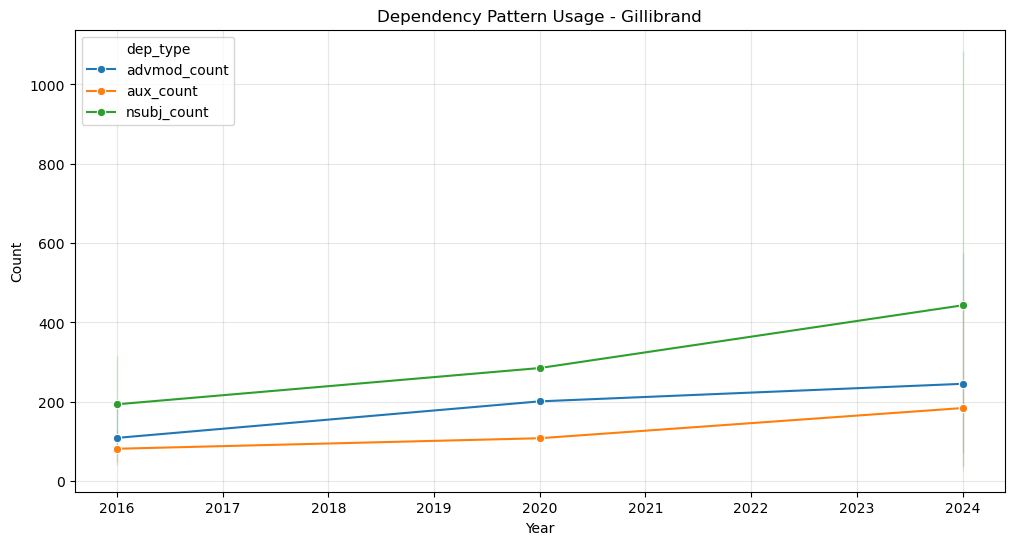

In [50]:
plt.figure(figsize=(12,6))
deps_df = df_gill.melt(
    id_vars=["year"],
    value_vars=["nsubj_count", "advmod_count", "aux_count"],
    var_name="dep_type",
    value_name="count"
)

sns.lineplot(data=deps_df.sort_values("year"), x="year", y="count", hue="dep_type", marker="o")
plt.title("Dependency Pattern Usage - Gillibrand")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()

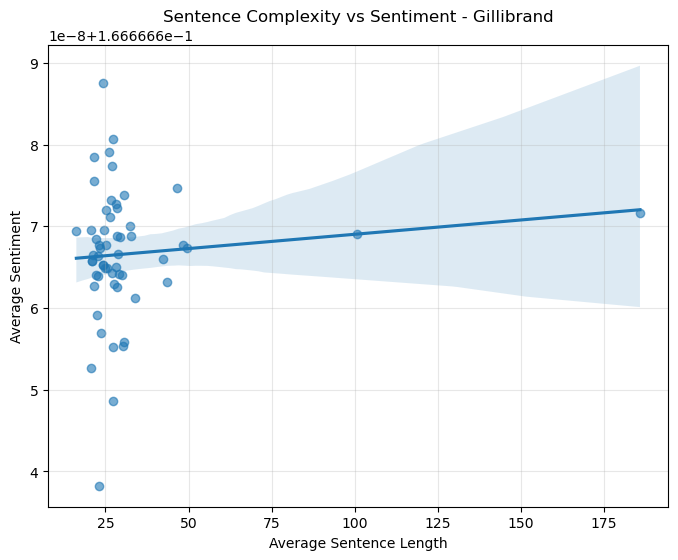

In [51]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_gill,
    x="avg_sentence_length",
    y="avg_sentiment",
    scatter_kws={"alpha":0.6}
)
plt.title("Sentence Complexity vs Sentiment - Gillibrand")
plt.xlabel("Average Sentence Length")
plt.ylabel("Average Sentiment")
plt.grid(True, alpha=0.3)
plt.show()

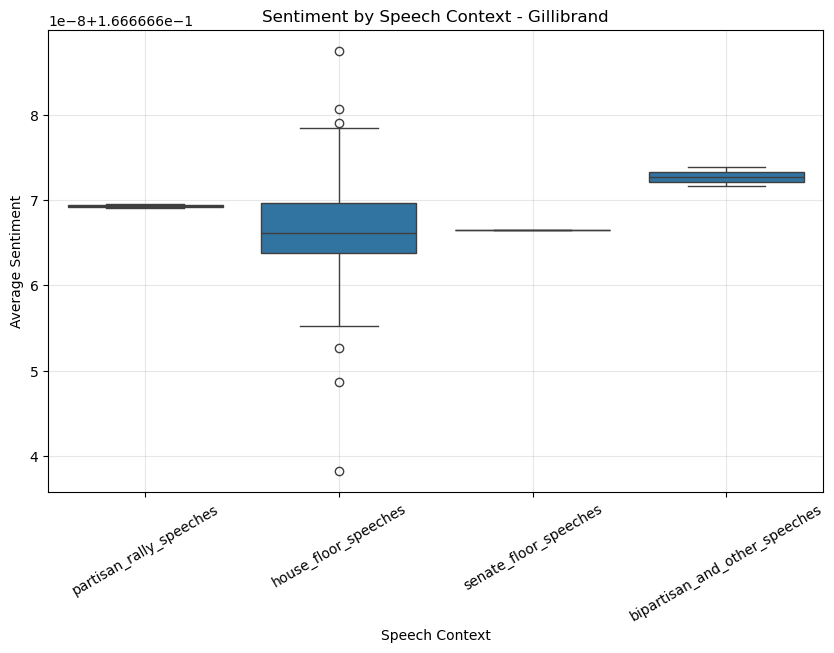

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_gill, x="type_of_speech", y="avg_sentiment")
plt.title("Sentiment by Speech Context - Gillibrand")
plt.xlabel("Speech Context")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=30)
plt.grid(True, alpha=0.3)
plt.show()

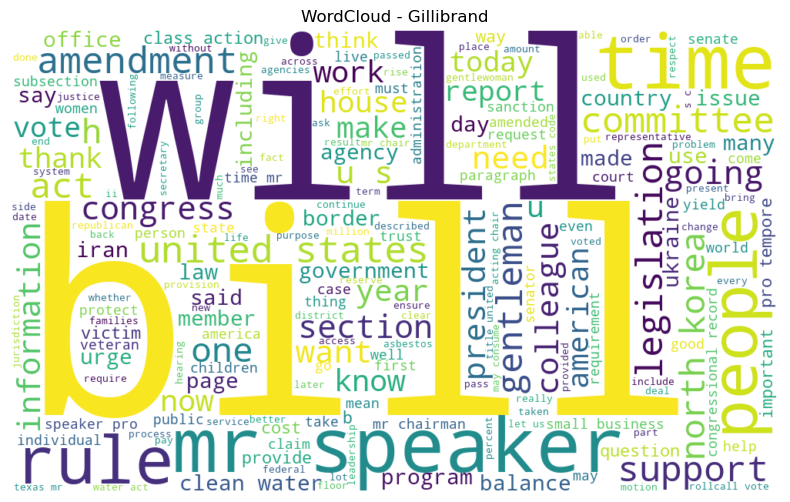

In [53]:
from wordcloud import WordCloud

all_text = " ".join(df_gill["clean_text"].tolist())
wc = WordCloud(width=1000, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Gillibrand")
plt.show()

/var/folders/43/90zcv4qx60q6fbz31lntl35r0000gn/T/ipykernel_31370/2564888995.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=verb_df, y="verb", x="count", palette="magma")


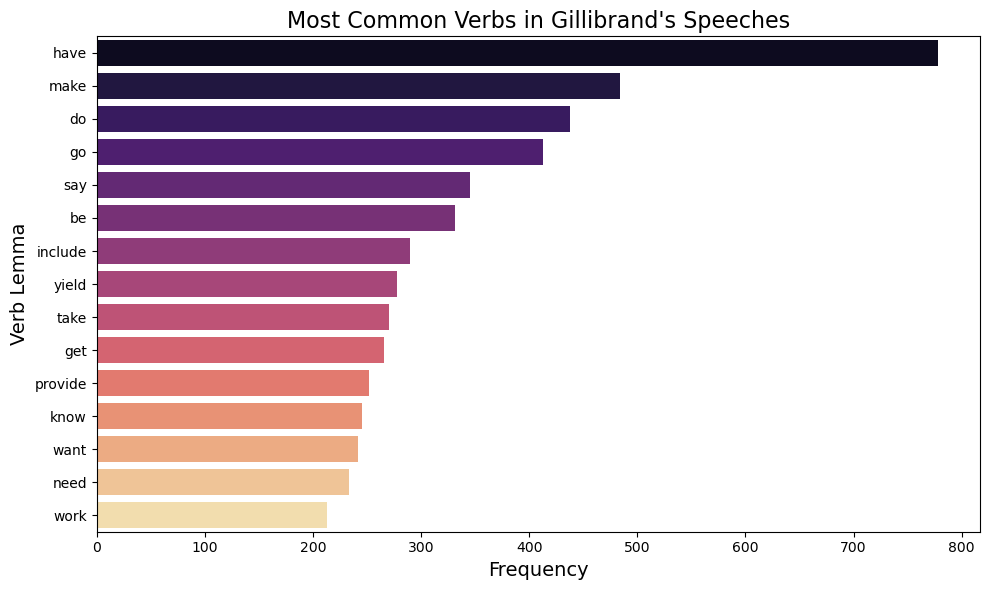

In [ ]:
from collections import Counter

verb_lemmas = []

# for doc in df_gill["stanza_doc"].dropna():
#     for sentence in doc.sentences:
#         for tok in sentence.tokens:
#             word = tok.words[0]  # each token may have subwords
#             if word.upos == "VERB":
#                 verb_lemmas.append(word.lemma)

# stanza_doc contains a list of sentences, not a Document object
for sentences in df_gill["stanza_doc"].dropna():
    if sentences is None:
        continue
    for sentence in sentences:
        for tok in sentence.tokens:
            word = tok.words[0]  # each token may have subwords
            if word.upos == "VERB":
                verb_lemmas.append(word.lemma)

# Top 15 verbs
top_verbs = Counter(verb_lemmas).most_common(15)
verb_df = pd.DataFrame(top_verbs, columns=["verb", "count"])

plt.figure(figsize=(10,6))
sns.barplot(data=verb_df, y="verb", x="count", palette="magma")
plt.title("Most Common Verbs in Gillibrand's Speeches", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Verb Lemma", fontsize=14)
plt.tight_layout()
plt.show()

## Visualizations for Correa


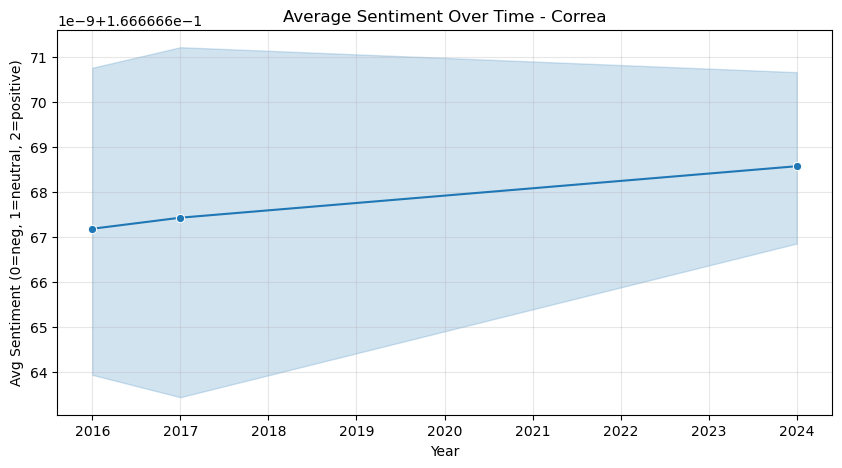

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_corr.sort_values("year"), x="year", y="avg_sentiment", marker="o")
plt.title("Average Sentiment Over Time - Correa")
plt.xlabel("Year")
plt.ylabel("Avg Sentiment (0=neg, 1=neutral, 2=positive)")
plt.grid(True, alpha=0.3)
plt.show()


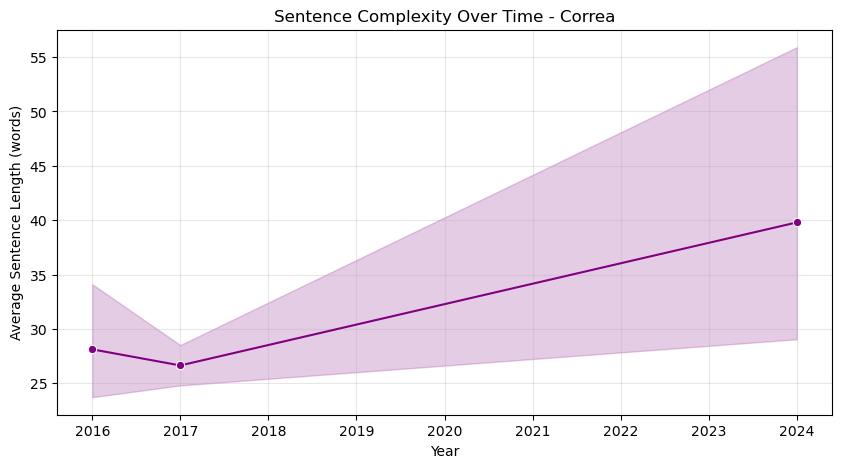

In [67]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_corr.sort_values("year"), x="year", y="avg_sentence_length", marker="o", color="purple")
plt.title("Sentence Complexity Over Time - Correa")
plt.xlabel("Year")
plt.ylabel("Average Sentence Length (words)")
plt.grid(True, alpha=0.3)
plt.show()


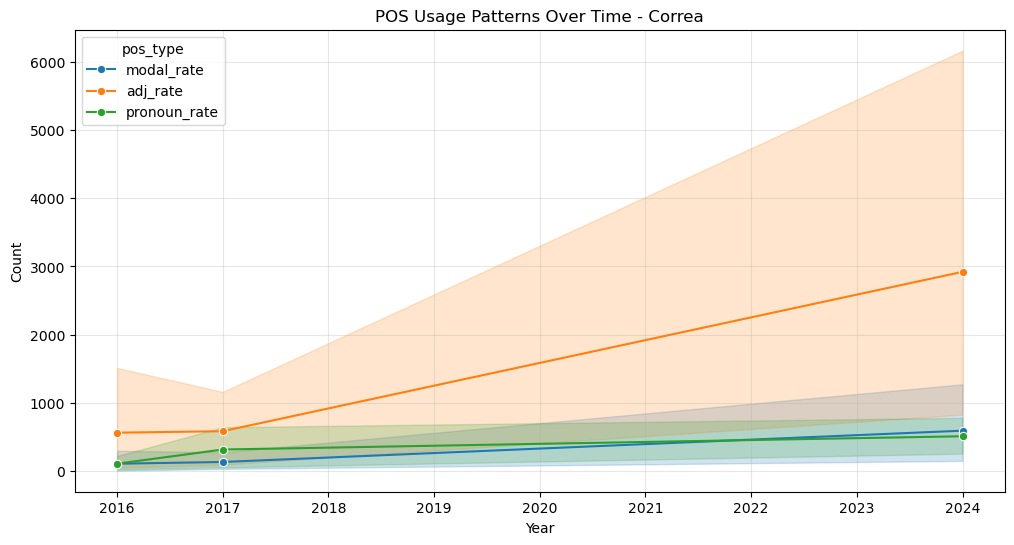

In [70]:
plt.figure(figsize=(12,6))
melt_df = df_corr.melt(
    id_vars=["year"],
    value_vars=["pronoun_rate", "modal_rate", "adj_rate"],
    var_name="pos_type",
    value_name="count"
)

sns.lineplot(data=melt_df.sort_values("year"), x="year", y="count", hue="pos_type", marker="o")
plt.title("POS Usage Patterns Over Time - Correa")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()


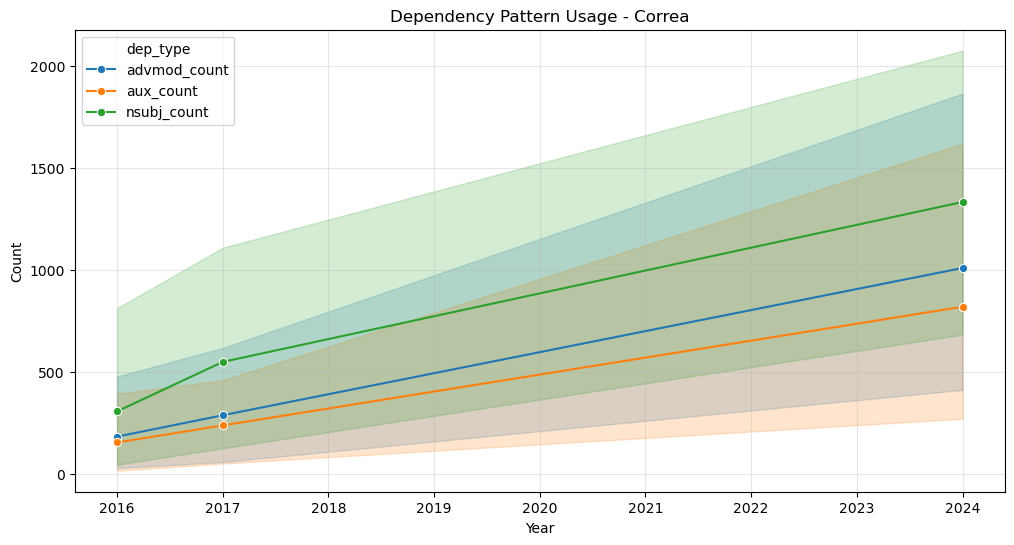

In [71]:
plt.figure(figsize=(12,6))
deps_df = df_corr.melt(
    id_vars=["year"],
    value_vars=["nsubj_count", "advmod_count", "aux_count"],
    var_name="dep_type",
    value_name="count"
)

sns.lineplot(data=deps_df.sort_values("year"), x="year", y="count", hue="dep_type", marker="o")
plt.title("Dependency Pattern Usage - Correa")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()


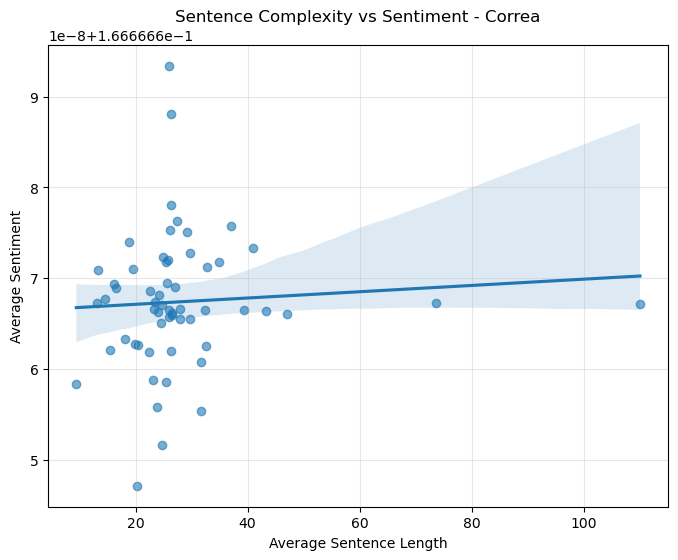

In [72]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_corr,
    x="avg_sentence_length",
    y="avg_sentiment",
    scatter_kws={"alpha":0.6}
)
plt.title("Sentence Complexity vs Sentiment - Correa")
plt.xlabel("Average Sentence Length")
plt.ylabel("Average Sentiment")
plt.grid(True, alpha=0.3)
plt.show()


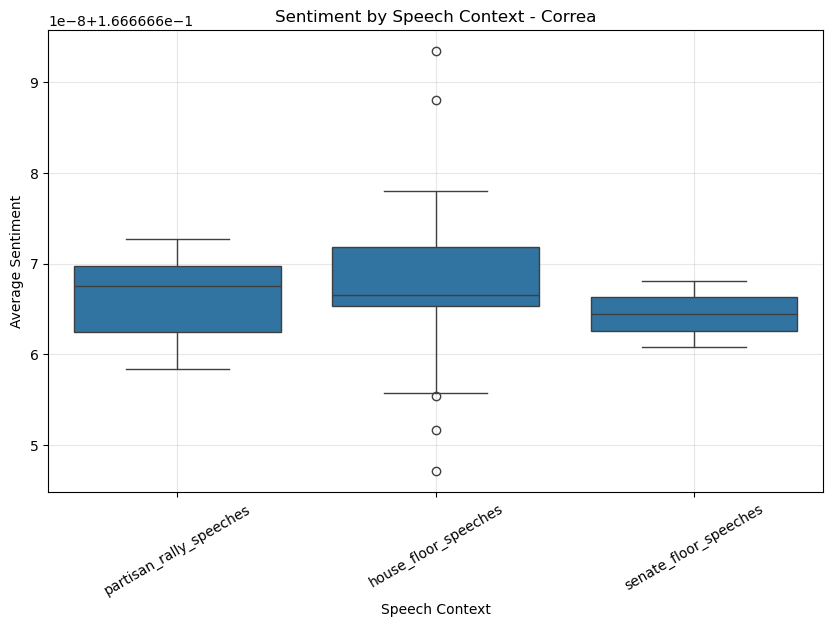

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_corr, x="type_of_speech", y="avg_sentiment")
plt.title("Sentiment by Speech Context - Correa")
plt.xlabel("Speech Context")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=30)
plt.grid(True, alpha=0.3)
plt.show()


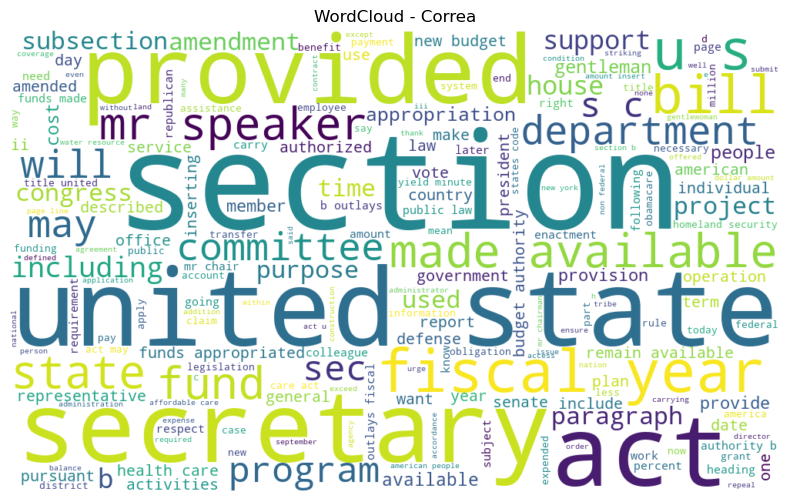

In [74]:
from wordcloud import WordCloud

all_text = " ".join(df_corr["clean_text"].tolist())
wc = WordCloud(width=1000, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Correa")
plt.show()


/var/folders/43/90zcv4qx60q6fbz31lntl35r0000gn/T/ipykernel_31370/2247463760.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=verb_df, y="verb", x="count", palette="magma")


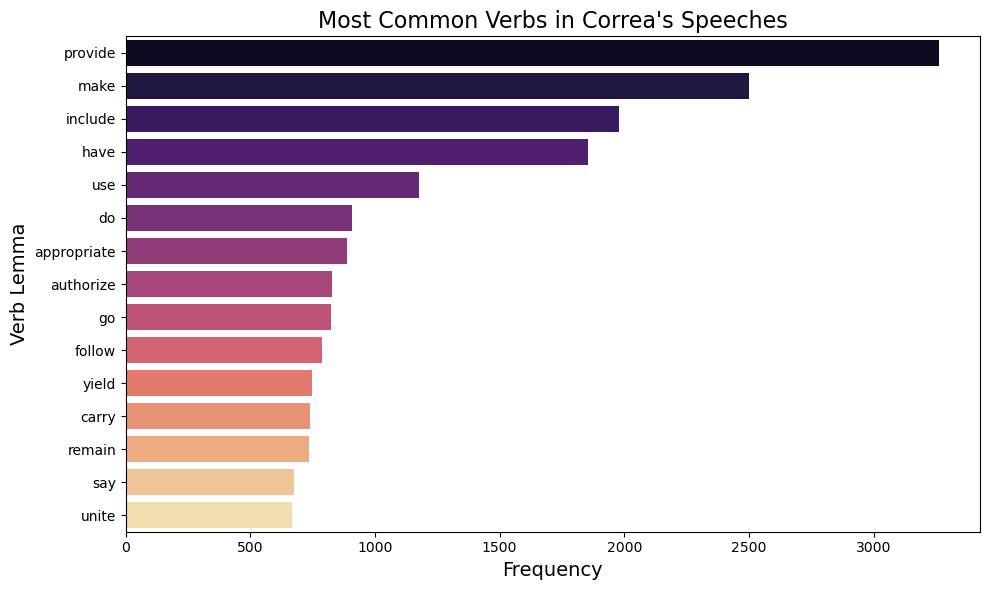

In [75]:
from collections import Counter

verb_lemmas = []

# stanza_doc contains a list of sentences, not a Document object
for sentences in df_corr["stanza_doc"].dropna():
    if sentences is None:
        continue
    for sentence in sentences:
        for tok in sentence.tokens:
            word = tok.words[0]  # each token may have subwords
            if word.upos == "VERB":
                verb_lemmas.append(word.lemma)

# Top 15 verbs
top_verbs = Counter(verb_lemmas).most_common(15)
verb_df = pd.DataFrame(top_verbs, columns=["verb", "count"])

plt.figure(figsize=(10,6))
sns.barplot(data=verb_df, y="verb", x="count", palette="magma")
plt.title("Most Common Verbs in Correa's Speeches", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Verb Lemma", fontsize=14)
plt.tight_layout()
plt.show()


## Visualizations for Bera

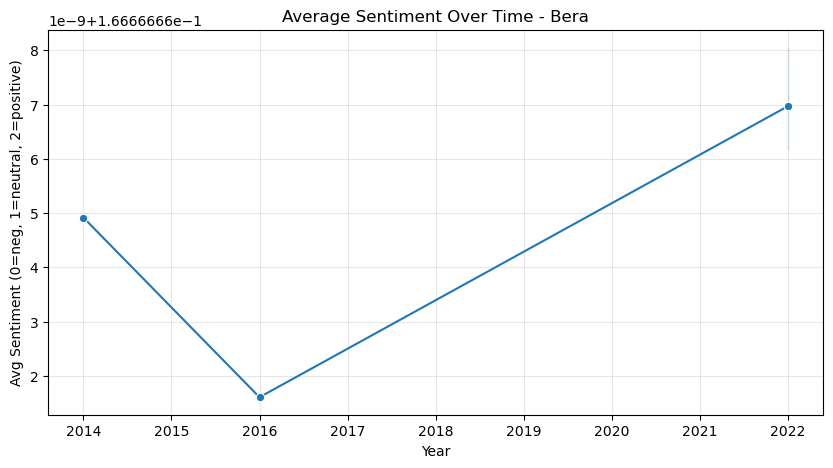

In [76]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_bera.sort_values("year"), x="year", y="avg_sentiment", marker="o")
plt.title("Average Sentiment Over Time - Bera")
plt.xlabel("Year")
plt.ylabel("Avg Sentiment (0=neg, 1=neutral, 2=positive)")
plt.grid(True, alpha=0.3)
plt.show()


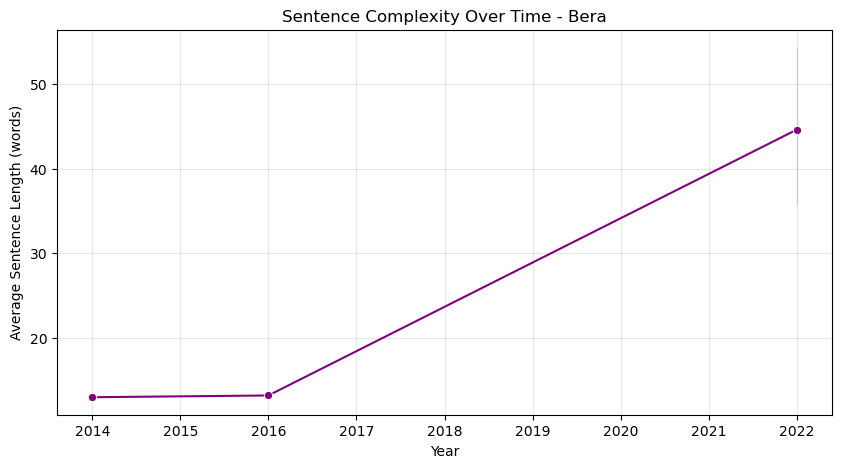

In [77]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_bera.sort_values("year"), x="year", y="avg_sentence_length", marker="o", color="purple")
plt.title("Sentence Complexity Over Time - Bera")
plt.xlabel("Year")
plt.ylabel("Average Sentence Length (words)")
plt.grid(True, alpha=0.3)
plt.show()


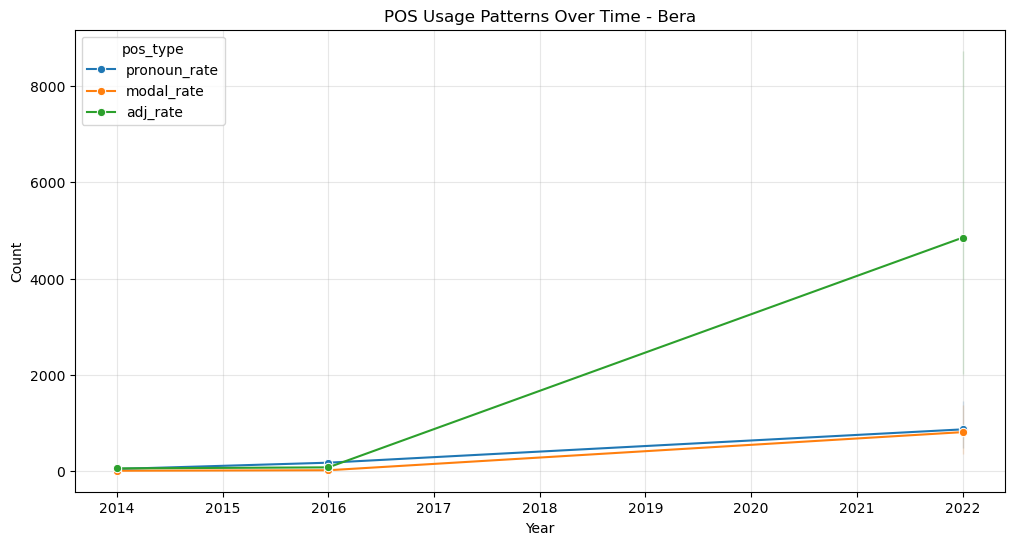

In [78]:
plt.figure(figsize=(12,6))
melt_df = df_bera.melt(
    id_vars=["year"],
    value_vars=["pronoun_rate", "modal_rate", "adj_rate"],
    var_name="pos_type",
    value_name="count"
)

sns.lineplot(data=melt_df.sort_values("year"), x="year", y="count", hue="pos_type", marker="o")
plt.title("POS Usage Patterns Over Time - Bera")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()


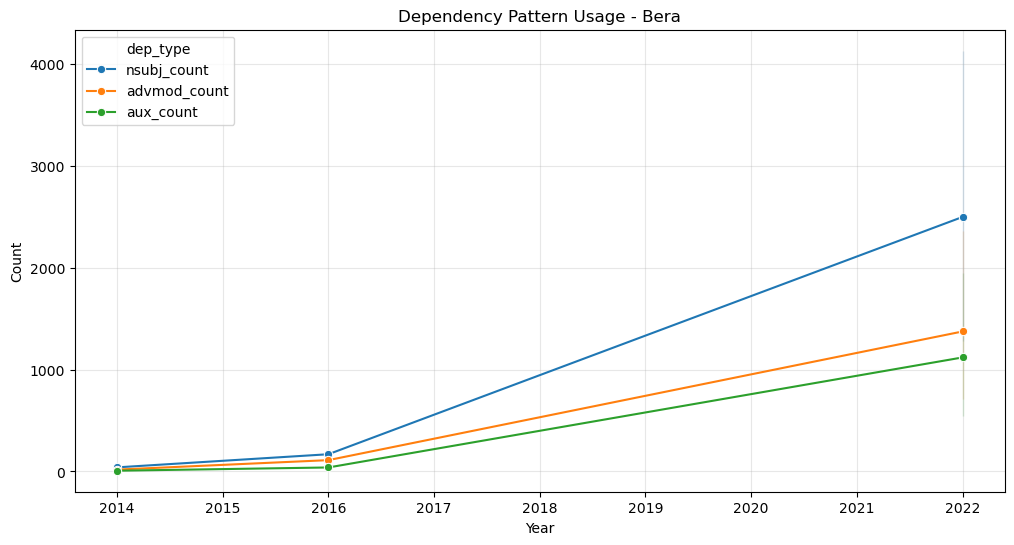

In [79]:
plt.figure(figsize=(12,6))
deps_df = df_bera.melt(
    id_vars=["year"],
    value_vars=["nsubj_count", "advmod_count", "aux_count"],
    var_name="dep_type",
    value_name="count"
)

sns.lineplot(data=deps_df.sort_values("year"), x="year", y="count", hue="dep_type", marker="o")
plt.title("Dependency Pattern Usage - Bera")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()


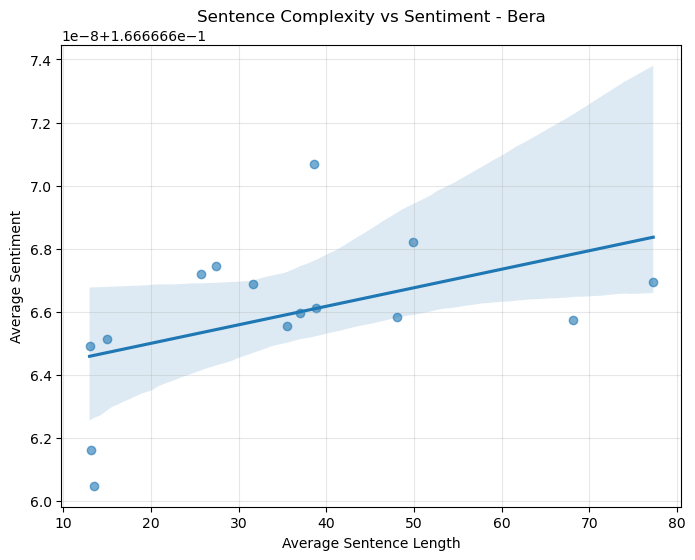

In [80]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_bera,
    x="avg_sentence_length",
    y="avg_sentiment",
    scatter_kws={"alpha":0.6}
)
plt.title("Sentence Complexity vs Sentiment - Bera")
plt.xlabel("Average Sentence Length")
plt.ylabel("Average Sentiment")
plt.grid(True, alpha=0.3)
plt.show()


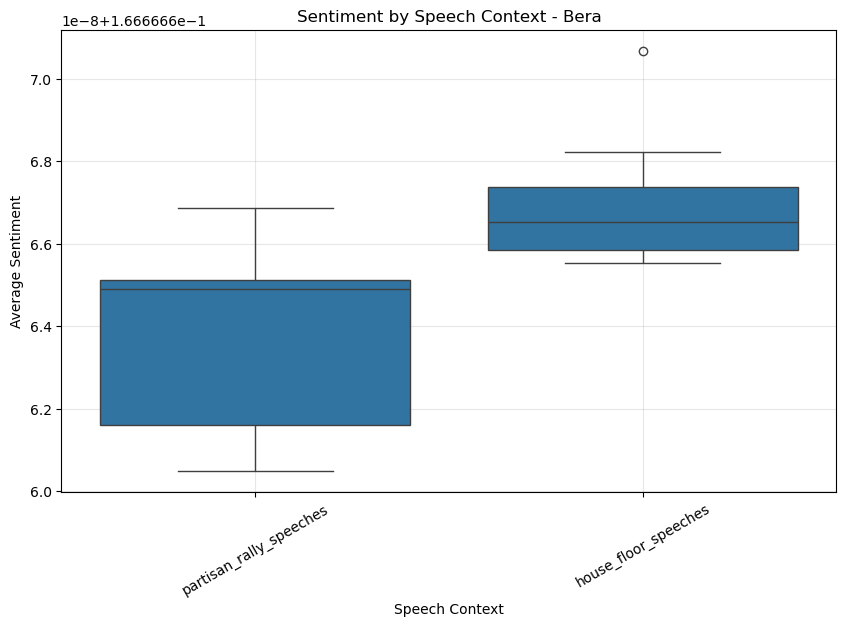

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_bera, x="type_of_speech", y="avg_sentiment")
plt.title("Sentiment by Speech Context - Bera")
plt.xlabel("Speech Context")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=30)
plt.grid(True, alpha=0.3)
plt.show()


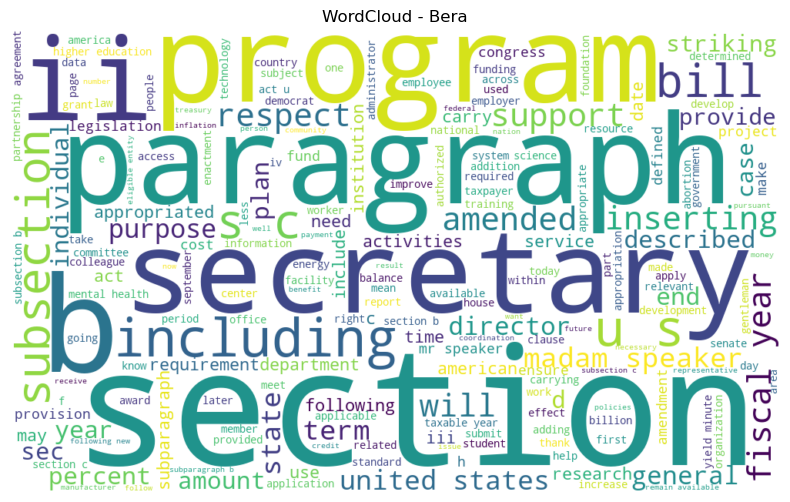

In [82]:
from wordcloud import WordCloud

all_text = " ".join(df_bera["clean_text"].tolist())
wc = WordCloud(width=1000, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Bera")
plt.show()


/var/folders/43/90zcv4qx60q6fbz31lntl35r0000gn/T/ipykernel_31370/1569625830.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=verb_df, y="verb", x="count", palette="magma")


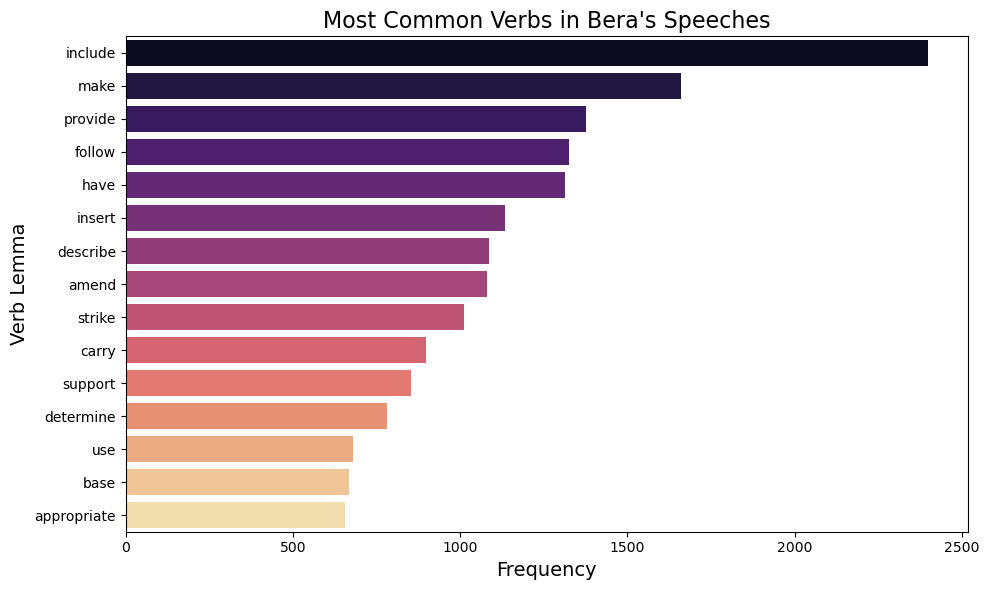

In [83]:
from collections import Counter

verb_lemmas = []

# stanza_doc contains a list of sentences, not a Document object
for sentences in df_bera["stanza_doc"].dropna():
    if sentences is None:
        continue
    for sentence in sentences:
        for tok in sentence.tokens:
            word = tok.words[0]  # each token may have subwords
            if word.upos == "VERB":
                verb_lemmas.append(word.lemma)

# Top 15 verbs
top_verbs = Counter(verb_lemmas).most_common(15)
verb_df = pd.DataFrame(top_verbs, columns=["verb", "count"])

plt.figure(figsize=(10,6))
sns.barplot(data=verb_df, y="verb", x="count", palette="magma")
plt.title("Most Common Verbs in Bera's Speeches", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Verb Lemma", fontsize=14)
plt.tight_layout()
plt.show()
